# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | barranca
Processing Record 3 of Set 1 | myrtle beach
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | arica
Processing Record 8 of Set 1 | yamazakicho-nakabirose
Processing Record 9 of Set 1 | qamdo
Processing Record 10 of Set 1 | sola
Processing Record 11 of Set 1 | la passe
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | margate
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | selizharovo
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | malanje
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | port-aux-f

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          605
Lat           605
Lng           605
Max Temp      605
Humidity      605
Cloudiness    605
Wind Speed    605
Country       605
Date          605
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,46.56,81,54,4.00,CA,1687086391
1,barranca,-10.7500,-77.7667,67.98,82,100,7.54,PE,1687086537
2,myrtle beach,33.6891,-78.8867,70.09,89,0,0.00,US,1687086538
3,bethel,41.3712,-73.4140,63.48,79,100,3.44,US,1687086539
4,grytviken,-54.2811,-36.5092,28.29,68,47,7.11,GS,1687086539


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

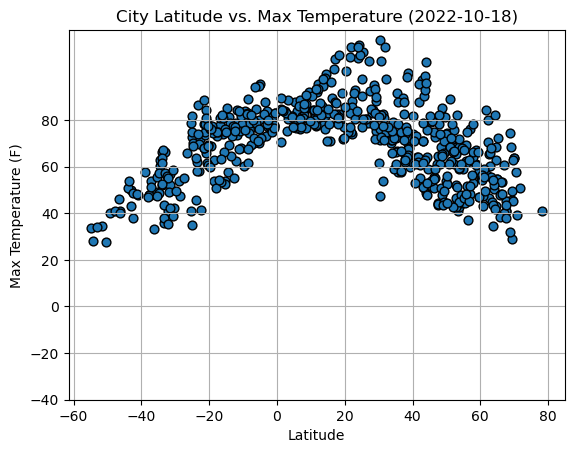

In [19]:
# Build scatter plot for latitude vs. temperature


# Incorporate the other graph properties
max_temp_lat = city_data_df.plot.scatter("Lat",'Max Temp', edgecolor='black', s=40)
max_temp_lat.set_title("City Latitude vs. Max Temperature (2022-10-18)")
max_temp_lat.set_ylabel("Max Temperature (F)")
max_temp_lat.set_xlabel("Latitude")
max_temp_lat.set_yticks(np.arange(-40, 100, 20))
max_temp_lat.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

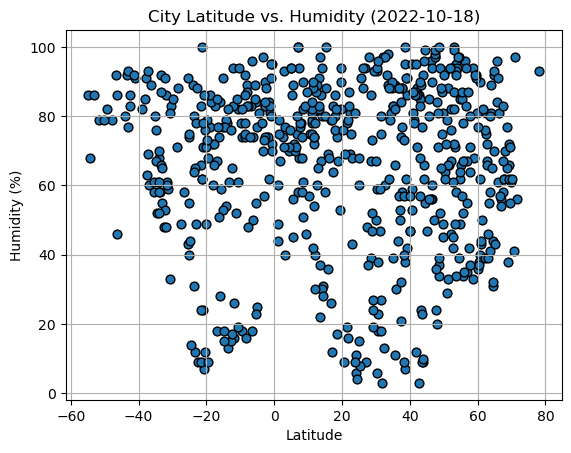

In [22]:
# Build the scatter plots for latitude vs. humidity
lat_humidity = city_data_df.plot.scatter("Lat", "Humidity", edgecolor='black', s=40)
lat_humidity.set_title("City Latitude vs. Humidity (2022-10-18)")
lat_humidity.set_ylabel("Humidity (%)")
lat_humidity.set_xlabel("Latitude")
lat_humidity.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

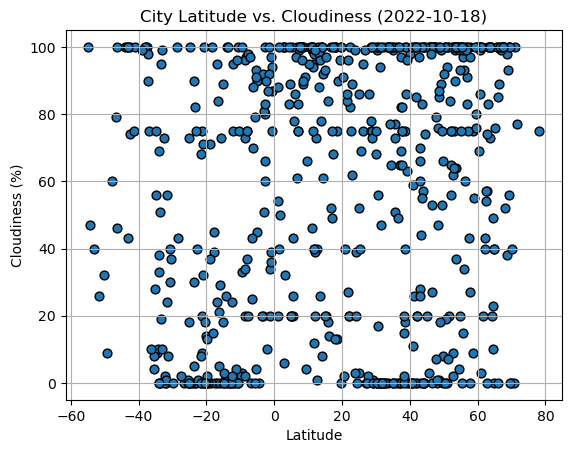

In [25]:
# Build the scatter plots for latitude vs. cloudiness

lat_cloudiness = city_data_df.plot.scatter("Lat","Cloudiness", edgecolor='black', s=40)
lat_cloudiness.set_title("City Latitude vs. Cloudiness (2022-10-18)")
lat_cloudiness.set_ylabel("Cloudiness (%)")
lat_cloudiness.set_xlabel("Latitude")
lat_cloudiness.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

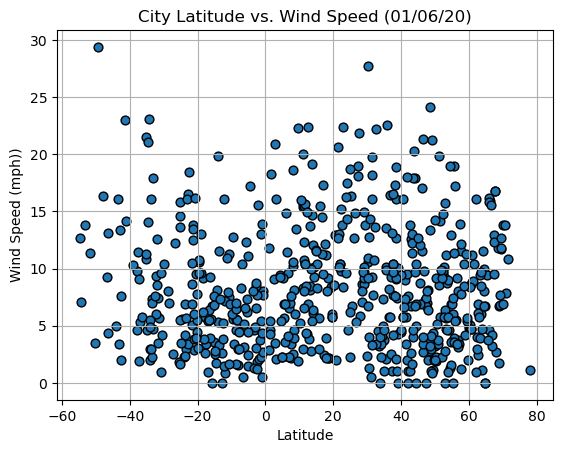

In [28]:
# Build the scatter plots for latitude vs. wind speed
lat_wind_speed = city_data_df.plot.scatter("Lat", "Wind Speed", edgecolor='black', s=40)
lat_wind_speed.set_title("City Latitude vs. Wind Speed (01/06/20)")
lat_wind_speed.set_ylabel("Wind Speed (mph))")
lat_wind_speed.set_xlabel("Latitude")
lat_wind_speed.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def lineregress(x,y):
    slope, intercept, rvalue, p_value, std_err =linregress(x, y)   
    plt.plot(x, [intercept + slope*val for val in x], 'r')
    print(f"The R-squared is: {rvalue}")


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,46.56,81,54,4.00,CA,1687086391
2,myrtle beach,33.6891,-78.8867,70.09,89,0,0.00,US,1687086538
3,bethel,41.3712,-73.4140,63.48,79,100,3.44,US,1687086539
7,yamazakicho-nakabirose,35.0000,134.5500,72.34,83,99,3.76,JP,1687086541
8,qamdo,31.1667,97.2333,54.03,47,94,0.54,CN,1687086541


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,barranca,-10.7500,-77.7667,67.98,82,100,7.54,PE,1687086537
4,grytviken,-54.2811,-36.5092,28.29,68,47,7.11,GS,1687086539
5,edinburgh of the seven seas,-37.0676,-12.3116,53.85,60,75,5.35,SH,1687086397
6,arica,-18.4750,-70.3042,62.83,72,100,9.22,CL,1687086540
9,sola,-13.8833,167.5500,78.01,78,100,19.84,VU,1687086542


###  Temperature vs. Latitude Linear Regression Plot

The R-squared is: -0.6829470709599784


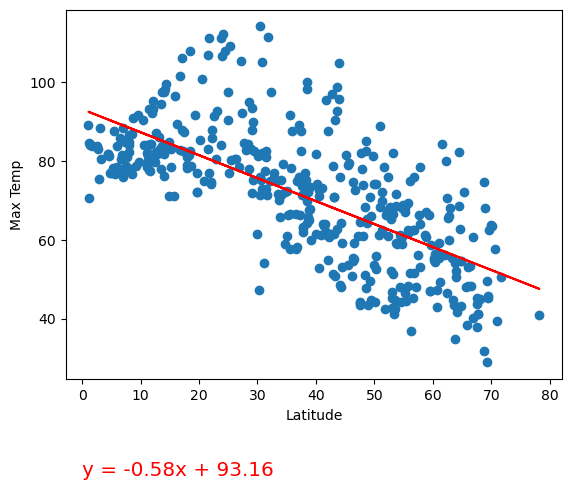

In [40]:
# Linear regression on Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(0,0,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("north_max_temp.png")

The R-squared is: 0.7952820158504365


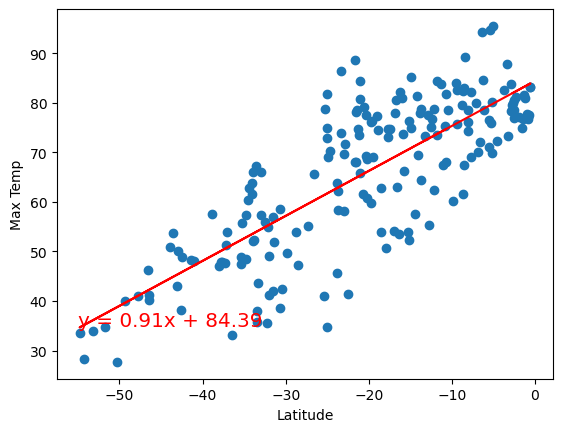

In [41]:
# Linear regression on Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(-55,35,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("south_max_temp.png")

**Discussion about the linear relationship:**

The linear regression in the northern hemisphere plot above demonstrates that the maximum temperature of the cities decreases as the location of the city becomes further and further from the equator. While the southern hemispher plot demonstrates that the maximum temperature of a city will increase as the location becomes closer to the equator.


### Humidity vs. Latitude Linear Regression Plot

The R-squared is: -0.014739887726158167


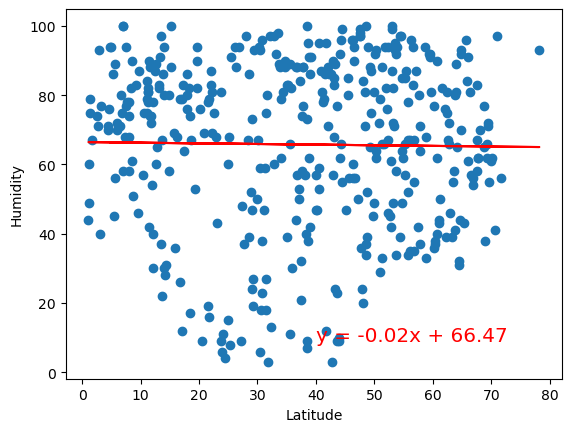

In [46]:
# Northern Hemisphere

lineregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(40,9,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("north_hum.png")

The R-squared is: -0.05790163553635554


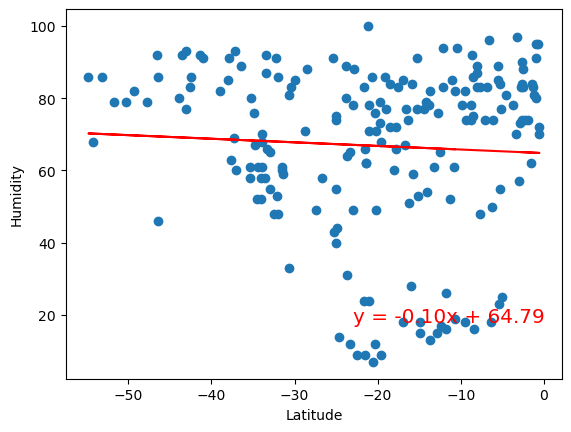

In [47]:
# Southern Hemisphere

lineregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(-23,18,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("south_hum.png")

**Discussion about the linear relationship:** 

Both plot depicted a small decline in humidity  as they moved southward. Correlation was relatively low in either case. Both depicted the majority of their humidity readings
at above 60%

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared is: -0.004777272748521559


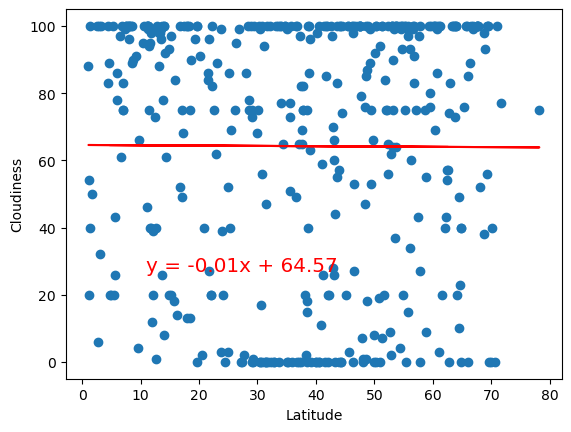

In [48]:
# Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(11,27,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("north_clouds.png")

The R-squared is: 0.0031349272949599974


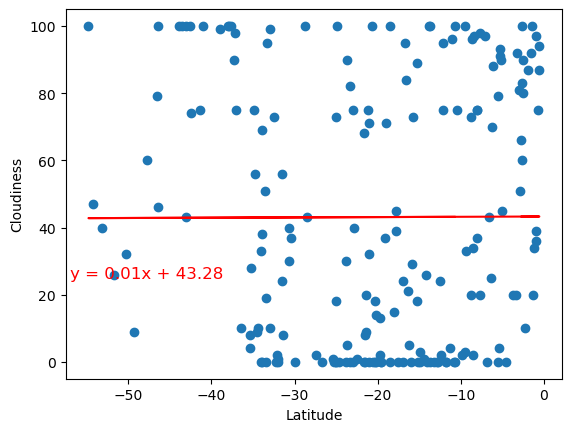

In [49]:
# Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(-57,25,s=f"y = {slope}x + {intercept}", c='r', size='large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("south_clouds.png")

**Discussion about the linear relationship:** 

 Both plot depicted a small rising in cloudiness  as they moved northward. Correlation was relatively low in either case. Both depicted a moderate number of complete cloudiness .

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared is: -0.11493420715903271


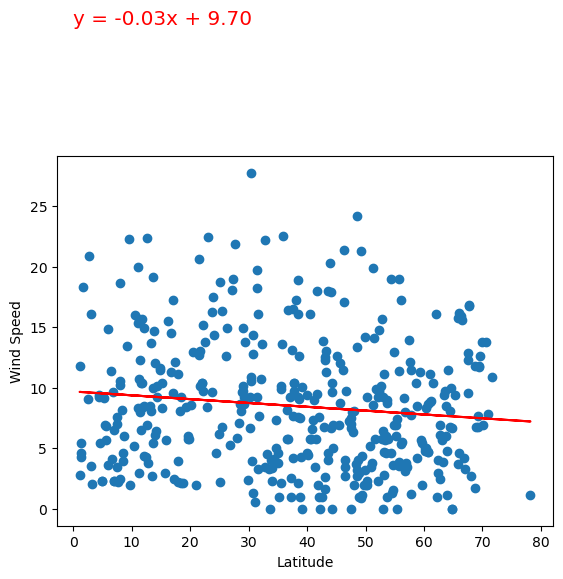

In [50]:
# Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(0,40,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("north_wind.png")

The R-squared is: -0.3037824019273747


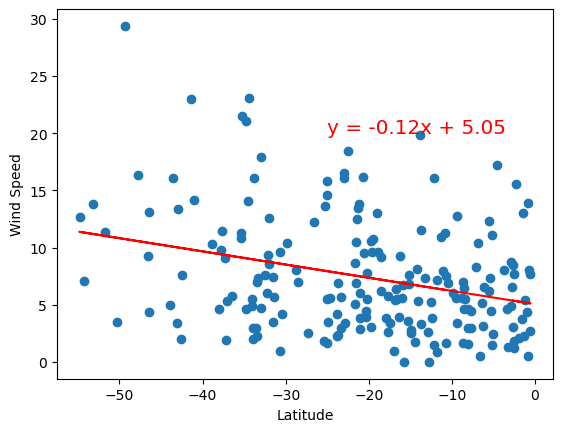

In [51]:
# Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(-25,20,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("south_wind.png")

**Discussion about the linear relationship:** 

Both plot depicted a small decline in wind speed as they approached the equator. Correlation was relatively low in either case. Both depicted the majority of their 
wind speeds at under 10.